<a href="https://colab.research.google.com/github/wozzin/AI_deeplearning/blob/main/binary_classification_pulsar%2BPrecision%2CRecall%2CAcuuracy%2Cf1score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

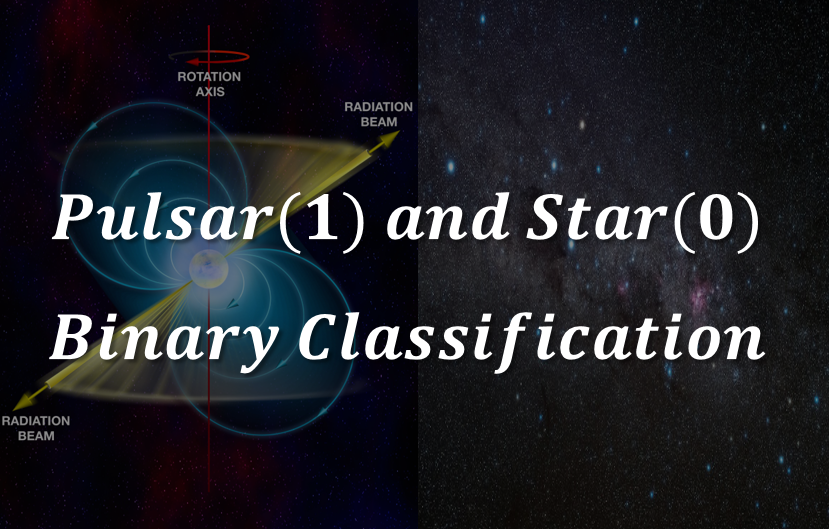

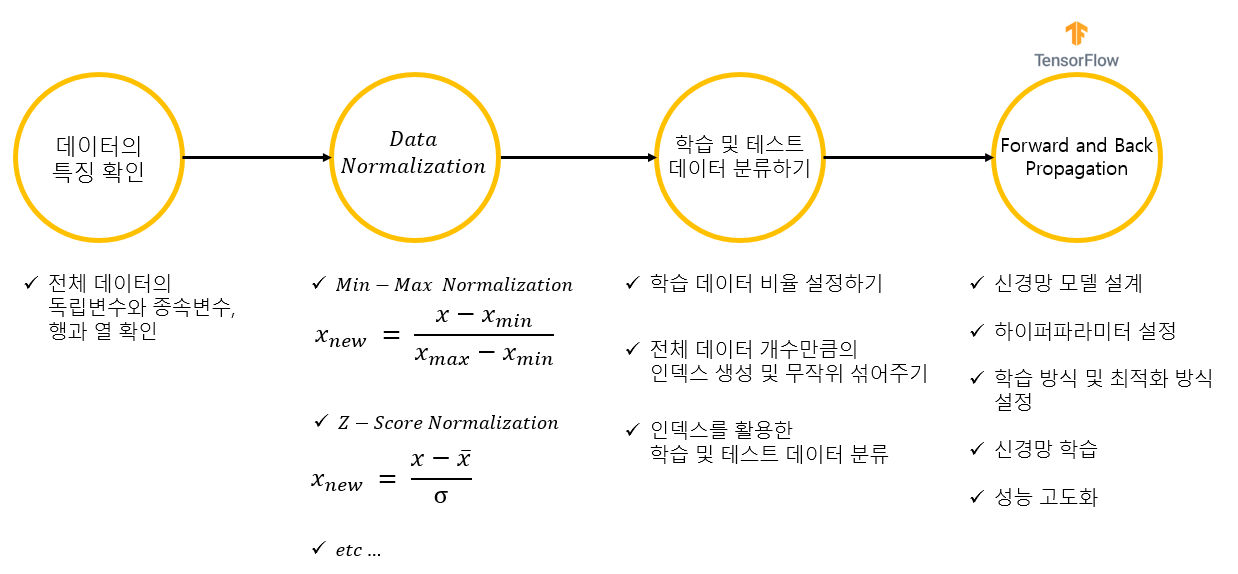

In [45]:
import numpy as np
import pandas as pd
import csv 
import tensorflow as tf
import matplotlib.pyplot as plt


In [46]:
df = pd.read_csv('/content/drive/MyDrive/Deep/pulsar_stars.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [47]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [48]:
set(df['target_class'])

{0, 1}

In [49]:
with open('/content/drive/MyDrive/Deep/pulsar_stars.csv') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)
    rows = []
    for row in csvreader:
        rows.append(row)

data = np.asarray(rows, dtype ='float32')
input_cnt, output_cnt = 8, 1

In [50]:
data[:][0]

array([140.5625    ,  55.68378   ,  -0.23457141,  -0.6996484 ,
         3.1998327 ,  19.110426  ,   7.9755316 ,  74.242226  ,
         0.        ], dtype=float32)

In [51]:
train_ratio = 0.8
mb_size = 32

test_begin_index = int(data.shape[0] * train_ratio)

print(test_begin_index)

14318


In [52]:
shuffle_map = np.arange(data.shape[0])

np.random.seed(1234)
np.random.shuffle(shuffle_map)
print(shuffle_map[:5])

[ 9375  1570 15443 14077  6079]


In [53]:
train_data = data[shuffle_map[:test_begin_index]]
test_data = data[shuffle_map[test_begin_index:]]


In [54]:
train_x, train_y = train_data[ : , : -output_cnt], train_data[ :, -output_cnt : ]
test_x, test_y = test_data[ : , : -output_cnt], test_data[ :, -output_cnt : ]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(14318, 8)
(14318, 1)
(3580, 8)
(3580, 1)


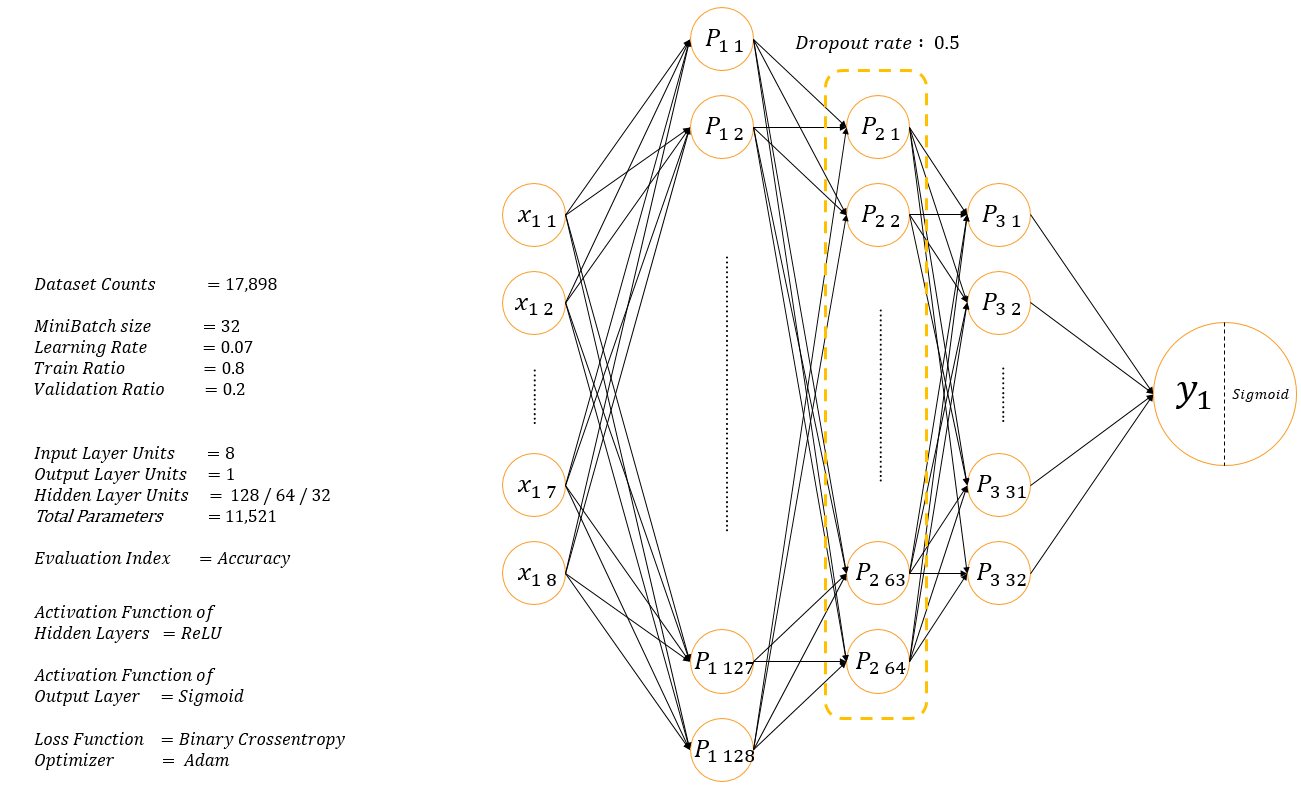

In [55]:
pulsar_DNN_drop_sigmoid = tf.keras.Sequential([
                                               tf.keras.layers.Dense(units=128, activation='relu', input_shape = [8,]),
                                               tf.keras.layers.Dense(units=64, activation='relu'),
                                               tf.keras.layers.Dropout(rate = 0.5),
                                               tf.keras.layers.Dense(units=32, activation='relu'),
                                               tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [56]:
pulsar_DNN_drop_sigmoid.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [57]:
pulsar_DNN_sigmoid = tf.keras.Sequential([
                                               tf.keras.layers.Dense(units=128, activation='relu', input_shape = [8,]),
                                               tf.keras.layers.Dense(units=64, activation='relu'),
                                               #tf.keras.layers.Dropout(rate = 0.5),
                                               tf.keras.layers.Dense(units=32, activation='relu'),
                                               tf.keras.layers.Dense(units=1, activation='sigmoid'),
])
pulsar_DNN_sigmoid.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [58]:
pulsar_DNN_drop_sigmoid.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
                                loss = 'binary_crossentropy',
                                metrics = ['accuracy'])

In [59]:
 history = pulsar_DNN_drop_sigmoid.fit(train_x,train_y,
                            epochs = 15,
                            batch_size = 32,
                            validation_split = 0.2,
                            callbacks = [tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/15
358/358 [==============================] - 1s 2ms/step - loss: 0.5365 - accuracy: 0.9340 - val_loss: 0.2924 - val_accuracy: 0.9120
Epoch 2/15
358/358 [==============================] - 1s 2ms/step - loss: 0.2165 - accuracy: 0.9439 - val_loss: 0.2356 - val_accuracy: 0.9378
Epoch 3/15
358/358 [==============================] - 1s 2ms/step - loss: 0.2749 - accuracy: 0.9433 - val_loss: 0.1210 - val_accuracy: 0.9759
Epoch 4/15
358/358 [==============================] - 1s 2ms/step - loss: 0.1916 - accuracy: 0.9431 - val_loss: 0.1555 - val_accuracy: 0.9120
Epoch 5/15
358/358 [==============================] - 1s 2ms/step - loss: 0.1870 - accuracy: 0.9372 - val_loss: 0.1055 - val_accuracy: 0.9794
Epoch 6/15
358/358 [==============================] - 1s 2ms/step - loss: 0.1641 - accuracy: 0.9629 - val_loss: 0.1069 - val_accuracy: 0.9780
Epoch 7/15
358/358 [==============================] - 1s 2ms/step - loss: 0.1816 - accuracy: 0.9566 - val_loss: 0.1639 - val_accuracy: 0.9612
Epoch 

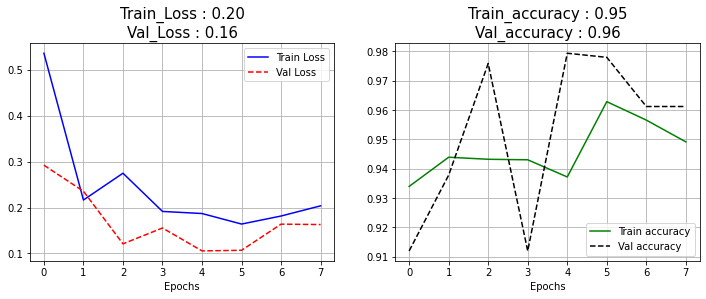

In [60]:
val_accuracy = history.history['val_accuracy']
accuracy     = history.history['accuracy']

val_loss = history.history['val_loss']
loss     = history.history['loss']

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'Train Loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val Loss')

plt.xlabel('Epochs')
plt.title("Train_Loss : {:.2f}\nVal_Loss : {:.2f}".format(loss[-1], val_loss[-1]),
          fontsize = 15)

plt.legend()
plt.grid()


plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], 'g-', label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'Val accuracy')

plt.xlabel('Epochs')
plt.title("Train_accuracy : {:.2f}\nVal_accuracy : {:.2f}".format(accuracy[-1], val_accuracy[-1]),
          fontsize = 15)

plt.legend()
plt.grid()

plt.show()


In [61]:
pred_Y = pulsar_DNN_drop_sigmoid.predict(test_x)
pred_Y = np.round(pred_Y)
print(pred_Y[:20])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [62]:
print(pd.DataFrame(pred_Y).value_counts())

print(pd.DataFrame(test_y).value_counts())

0.0    3407
1.0     173
dtype: int64
0.0    3258
1.0     322
dtype: int64


# confusion matrix
# 혼동행렬

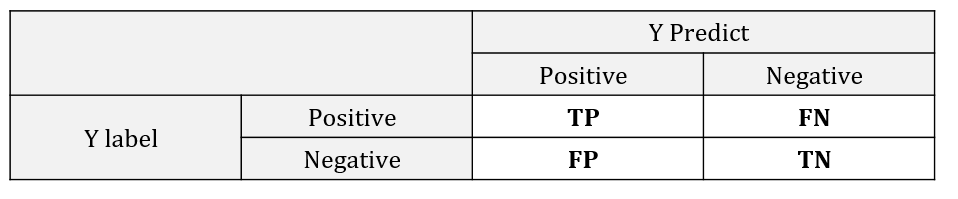

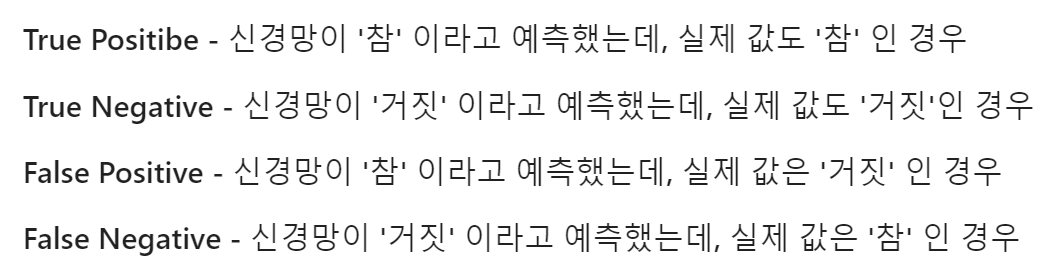

In [63]:
# 예측값(est)이 참(yes)이냐? 
est_yes = np.greater(pred_Y, 0.5)
print("est_yes \n", est_yes)

# 실제값(ans)이 참(yes)이냐?
ans_yes = np.greater(test_y, 0.5)
print("ans_yes : \n", ans_yes)

est_yes 
 [[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
ans_yes : 
 [[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [64]:
test_y[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [65]:
# 주요 함수 
# np.greater(x1, x2)
# : 첫 번째 매개변수가 두 번째 매개변수 보다 크면 True를 반환합니다. 

# np.logical_and(x1, x2)
# : 첫 번째 매개변수와 두 번째 매개변수 모두 참일시 참(True)를 반환함 

# np.logical_not(x1)
# : 매개변수의 결과를 반대로 반환합니다.(True -> False)

In [66]:
# 예측값(est)이 참(yes)이냐? 
# Y_Predict - Positive
est_yes = np.greater(pred_Y, 0.5)
print("est_yes \n", est_yes)


# 실제값(ans)이 참(yes)이냐?
# Y_label - Positive
ans_yes = np.greater(test_y, 0.5)
print("ans_yes : \n", ans_yes)

est_yes 
 [[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
ans_yes : 
 [[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [67]:
# 예측값과 실제값이 거짓인지도 확인을 해야 하니 
# 위에서 얻은 결과의 반대 되는값이 필요합니다.  

# 예측값(est)이 거짓(no)이냐?
# Y_Predict - Negative
est_no = np.logical_not(est_yes)
print("est_no \n",est_no[:5])


# 실제값(ans)이 거짓(no)이냐? 
# Y_label   - Negative
ans_no = np.logical_not(ans_yes)
print("ans_no :\n", ans_no[:5])

est_no 
 [[ True]
 [ True]
 [ True]
 [ True]
 [ True]]
ans_no :
 [[ True]
 [ True]
 [ True]
 [ True]
 [ True]]


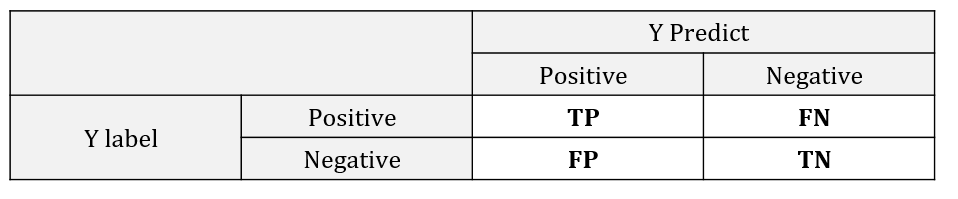

In [68]:
# np.logical_and(est_yes, ans_yes)
tp = np.sum(np.logical_and(est_yes, ans_yes))
print("TP : ", tp)

tn = np.sum(np.logical_and(est_no, ans_no))
print("TN : ", tn)

fp = np.sum(np.logical_and(ans_no, est_yes))
print("FP : ", fp)

fn = np.sum(np.logical_and(ans_yes, est_no))
print("FN : ", fn)

TP :  168
TN :  3253
FP :  5
FN :  154


In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#from sklearn.metrics import classification_report

In [84]:
print(test_y[:,0])
print(pred_Y[:,0])

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [85]:
print(confusion_matrix(test_y[:,0], pred_Y[:,0]))
print("precision : ",precision_score(test_y[:,0], pred_Y[:,0]))
print("recall    : ",recall_score(test_y[:,0], pred_Y[:,0]))
print("accuracy  : ", accuracy_score(test_y[:,0], pred_Y[:,0]))
print("f1_score  : ", f1_score(test_y[:,0], pred_Y[:,0]))

[[3253    5]
 [ 154  168]]
precision :  0.9710982658959537
recall    :  0.5217391304347826
accuracy  :  0.955586592178771
f1_score  :  0.6787878787878787


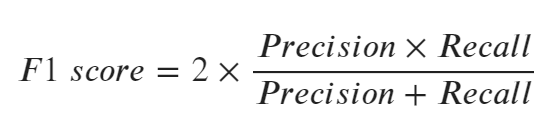

In [86]:
precision = safe_div(tp , (tp + fp))
print("precision : ", precision)

recall = safe_div(tp , (tp + fn))
print("recall : ", recall)

accuracy = safe_div( (tp + tn) , (tp + tn + fp + fn) )
print("accuracy : ", accuracy)

f1 = 2 * safe_div( (precision * recall),(precision + recall))
print("F1-score : " , f1)

precision :  0.9710982658959537
recall :  0.5217391304347826
accuracy :  0.955586592178771
F1-score :  0.6787878787878787


In [87]:
def safe_div(p,q):
    p, q = float(p), float(q)

    if np.abs(q) < 1.0e-20:
        return np.sign(p)
    return p / q 

In [88]:
np.sign(0)

0

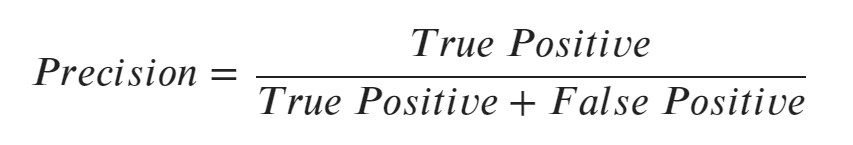

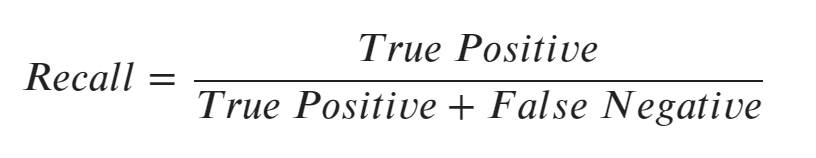

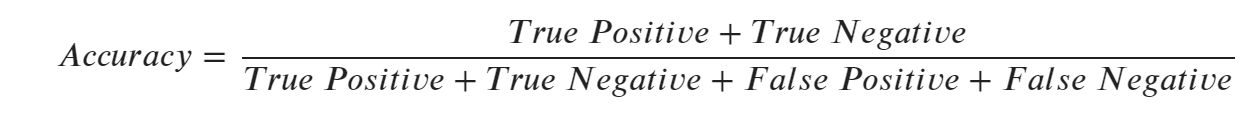

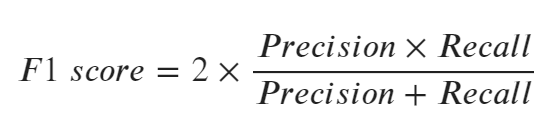